# Figure 5: spurious changes in CMIP6 when using shifting base-periods

(c) 2023 under a MIT License (https://mit-license.org)

Author: Lukas Brunner (l.brunner@univie.ac.at)

In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl

from core.mapplot import plot_map, plot_hatching, plot_boxes
from core.lineplot import (
    lineplot, 
    barplot_monthly, 
    barplot_monthly_difference, 
    blue,
    red,
)
from core.io_functions import model_names, get_filename, PLOT_PATH
mpl.rc('font', **{'size': 6})
cm = 1/2.54  # centimeters in inches

ERROR 1: PROJ: proj_create_from_database: Open of /jetfs/home/lbrunner/.conda/envs/model_learning/share/proj failed


## Figure 5a: Difference between two time periods 

In [2]:
models_diff = []
for model in model_names:
    da_base = (xr.open_dataset(get_filename(model))['exceedances'] > 0).mean('time')
    da_test = (xr.open_dataset(get_filename(model, startyear_base=2071, endyear_base=2100))['exceedances'] > 0).mean('time')
    da = (da_test - da_base) / da_base * 100
    da = da.expand_dims({'model': [model]})
    models_diff.append(da)
    
models_change = xr.concat(models_diff, dim='model') 

Mean (0/5/95/100 perc): -0.2% (-9.5%/-4.5%/3.8%/11.2%)
Fraction robust: 16.6%
lat=13.75, lon=56.25


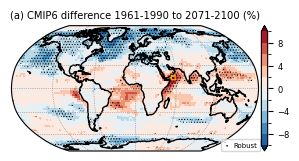

In [3]:
fig, ax = plot_map(models_change.mean('model'), levels=np.arange(-10, 11, 2))
plot_hatching(ax, models_change, min_value=2)
plot_boxes(ax, models_change, [(13.75, 56.25)], 'orange')
ax.set_title('(a) CMIP6 difference 1961-1990 to 2071-2100 (%)')
fig.tight_layout()
# fig.savefig(os.path.join(PLOT_PATH, 'figure5a.png'))
fig.savefig(os.path.join(PLOT_PATH, 'figure5a.pdf'))

## Figure 5c: Timeseries of difference between historical and future period in CanESM5

In [4]:
canesm5_past = xr.open_dataset(get_filename('CanESM5'))
canesm5_future = xr.open_dataset(get_filename('CanESM5', startyear_base=2071, endyear_base=2100))

Annual mean bias: -41.6%
Mean relative difference: 31.6%


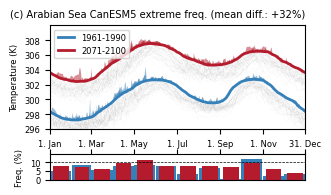

In [9]:
fig = plt.figure(figsize=(8*cm, 4.5*cm))
gs = fig.add_gridspec(
    2, 1, height_ratios=(4, 1),
    bottom=0.03, top=0.9, left=.13, right=.94, hspace=0.38)

ax1 = fig.add_subplot(gs[0])
lineplot(
    ax1, 
    canesm5_past['tasmax'].sel(lat=13.75, lon=56.25).values,
    threshold=canesm5_past['threshold'].sel(lat=13.75, lon=56.25).values,
    ylim=(296, 310),
    color=blue,
    show_legend=False,
)
lineplot(
    ax1, 
    canesm5_future['tasmax'].sel(lat=13.75, lon=56.25).values,
    threshold=canesm5_future['threshold'].sel(lat=13.75, lon=56.25).values,
    show_legend=False,
    )

hh1, = ax1.plot([], lw=2, color=blue, label='1961-1990')
hh2, = ax1.plot([], lw=2, color=red, label='2071-2100')
ax1.legend(handles=[hh1, hh2], loc='upper left')
ax1.set_yticks(range(296, 310, 2))


ax2 = fig.add_subplot(gs[1], sharex=ax1)
barplot_monthly(
    ax2, 
    canesm5_past['exceedances'].sel(lat=13.75, lon=56.25), 
    percentile=90,
    color=blue,
    show_bias=False,
)
barplot_monthly_difference(
    ax2, 
    canesm5_future['exceedances'].sel(lat=13.75, lon=56.25), 
    canesm5_past['exceedances'].sel(lat=13.75, lon=56.25), 
    show_bias=False,
)
ax2.tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)

ax1.set_title('(c) Arabian Sea CanESM5 extreme freq. (mean diff.: +32%)', loc='right')
# fig.savefig(os.path.join(PLOT_PATH, 'figure5c.png'), dpi=300)
fig.savefig(os.path.join(PLOT_PATH, 'figure5c.pdf'), dpi=300)

## Figure 5b: Difference between two time periods corrected

In [6]:
models_diff_corr = []
for model in model_names:
    da_base = (xr.open_dataset(get_filename(model))['exceedances_deseasonalized'] > 0).mean('time')
    da_test = (xr.open_dataset(get_filename(model, startyear_base=2071, endyear_base=2100))['exceedances_deseasonalized'] > 0).mean('time')
    da = (da_test - da_base) / da_base * 100
    da = da.expand_dims({'model': [model]})
    models_diff_corr.append(da)
    
models_diff_corr = xr.concat(models_diff_corr, dim='model') 


Mean (0/5/95/100 perc): 0.1% (-3.1%/-0.3%/0.9%/6.4%)
Fraction robust: 1.9%


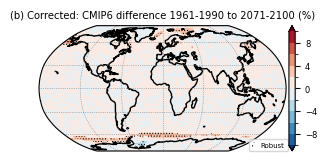

In [7]:
fig, ax = plot_map(models_diff_corr.mean('model'), levels=np.arange(-10, 11, 2))
plot_hatching(ax, models_diff_corr, min_value=2)
# plot_boxes(ax, models_diff_corr, [(13.75, 56.25)], 'orange')
ax.set_title('(b) Corrected: CMIP6 difference 1961-1990 to 2071-2100 (%)')
fig.tight_layout()
# fig.savefig(os.path.join(PLOT_PATH, 'figure5b.png'))
fig.savefig(os.path.join(PLOT_PATH, 'figure5b.pdf'))

## Figure 5d: Timeseries of difference between historical and future period in CanESM5 corrected

Annual mean bias: 0.3%
Mean relative difference: -0.6%


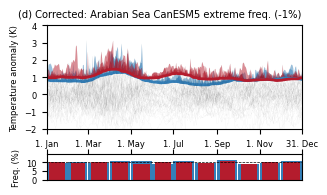

In [10]:
canesm5_past = xr.open_dataset(get_filename('CanESM5'))
canesm5_future = xr.open_dataset(get_filename('CanESM5', startyear_base=2071, endyear_base=2100))

fig = plt.figure(figsize=(8*cm, 4.5*cm))
gs = fig.add_gridspec(
    2, 1, height_ratios=(4, 1),
    bottom=0.03, top=0.9, left=.13, right=.94, hspace=0.38)

ax1 = fig.add_subplot(gs[0])
lineplot(
    ax1, 
    canesm5_past['tasmax_deseasonalized'].sel(lat=13.75, lon=56.25).values,
    threshold=canesm5_past['threshold_deseasonalized'].sel(lat=13.75, lon=56.25).values,
    ylim=(-2, 4),
    color=blue,
    show_legend=False,
)
lineplot(
    ax1, 
    canesm5_future['tasmax_deseasonalized'].sel(lat=13.75, lon=56.25).values,
    threshold=canesm5_future['threshold_deseasonalized'].sel(lat=13.75, lon=56.25).values,
    show_legend=False,
    )

hh1, = ax1.plot([], lw=2, color=blue, label='1961-1990')
hh2, = ax1.plot([], lw=2, color=red, label='2071-2100')
# ax1.legend(handles=[hh1, hh2], loc='upper right')


ax2 = fig.add_subplot(gs[1], sharex=ax1)
barplot_monthly(
    ax2, 
    canesm5_past['exceedances_deseasonalized'].sel(lat=13.75, lon=56.25), 
    percentile=90,
    color=blue,
    show_bias=False,
)
barplot_monthly_difference(
    ax2, 
    canesm5_future['exceedances_deseasonalized'].sel(lat=13.75, lon=56.25), 
    canesm5_past['exceedances_deseasonalized'].sel(lat=13.75, lon=56.25), 
    show_bias=False
)
ax2.tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)

ax1.set_title('(d) Corrected: Arabian Sea CanESM5 extreme freq. (-1%)', loc='right')
# fig.savefig(os.path.join(PLOT_PATH, 'figure5d.png'), dpi=300)
fig.savefig(os.path.join(PLOT_PATH, 'figure5d.pdf'), dpi=300)